# Análise de Dados - Comparação Candidatos do Estado da Bahia

#### Instalando as bibliotecas

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud, STOPWORDS

plt.style.use('fivethirtyeight')

%matplotlib inline

#### Candidatos de Ibicarai - Lendo os dados e selecionando as colunas para analise

In [2]:
colunas=['NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'DS_ELEICAO', 'DT_ELEICAO', 
            'SG_UF', 'NM_UE', 'DS_CARGO', 'SG_PARTIDO', 'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
     'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO']

In [3]:
dados = pd.read_csv('consulta_cand_2020_BA.csv', encoding='latin', sep=';', usecols=colunas)
dados = dados.rename(columns={'NM_UE':'cidade', 'NR_CANDIDATO':'numero', 'NM_CANDIDATO':'nome', 
                                              'NM_URNA_CANDIDATO':'nome_urna', 'DS_CARGO':'cargo', 'SG_PARTIDO':'partido',
                                              'NM_MUNICIPIO_NASCIMENTO':'cidade_nascimento', 
                                              'NR_IDADE_DATA_POSSE':'idade_na_posse', 'DS_GENERO':'sexo',
                                              'DS_GRAU_INSTRUCAO':'grau_instrucao', 'DS_ESTADO_CIVIL':'estado_civil',
                                              'DS_COR_RACA':'cor_raca', 'DS_OCUPACAO':'ocupacao'
                                             })

In [4]:
# dropar colunas desnecessárias
dados.drop(columns=['DS_ELEICAO', 'DT_ELEICAO', 'SG_UF'], inplace=True)

In [20]:
dados.head()

,cidade,cargo,numero,nome,nome_urna,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
0,Camacã,Vereador,10123,Leonardo Moreira Malaquias,Lió Da Civil,REPUBLICANOS,Camacã,50,Masculino,Ensino Médio Completo,Solteiro(A),Branca,Policial Civil
1,Santa Brígida,Vereador,12555,Jerferson Oliveira Neto,Xaverinho Do Pipa,PDT,Santa Brígida,32,Masculino,Ensino Médio Completo,Solteiro(A),Parda,Motorista Particular
2,Campo Formoso,Vereador,40777,Matheus Fernandes Ribeiro Camacam,Matheus Camacam,PSB,Campo Formoso,21,Masculino,Superior Incompleto,Solteiro(A),Branca,"Estudante, Bolsista, Estagiário E Assemelhados"
3,Gongogi,Prefeito,14,Milton Mendes Da Silva,Tucunaré,PTB,Itacaré,58,Masculino,Ensino Fundamental Incompleto,Solteiro(A),Parda,Empresário
4,Coração De Maria,Vereador,11555,Genilson Dos Santos Mendes,Dangola,PP,Conceição Do Jacuípe,44,Masculino,Lê E Escreve,Casado(A),Parda,Motorista Particular


In [65]:
dados.shape

(41112, 13)

#### Vamos padronizar as colunas de strings para que os valores fiquem minúsculos

In [6]:
colunas_strings = ['cidade', 'cargo', 'nome', 'nome_urna', 'cidade_nascimento', 
                   'sexo', 'grau_instrucao', 'estado_civil', 'cor_raca', 'ocupacao']

In [7]:
# aplicar metodo title() para colunas com strings
dados[colunas_strings] = dados[colunas_strings].apply(lambda x: x.str.title())

#### Separando o dataframe para a cidade de Ibicarai

In [11]:
candidatos_ibicarai = dados[dados['cidade'] == 'Ibicaraí']

#### Checando por valores nulos

In [67]:
dados.isna().sum()

cidade               0
cargo                0
numero               0
nome                 0
nome_urna            0
partido              0
cidade_nascimento    0
idade_na_posse       0
sexo                 0
grau_instrucao       0
estado_civil         0
cor_raca             0
ocupacao             0
dtype: int64

#### Avaliando tipos de dados

In [66]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41112 entries, 0 to 41170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cidade             41112 non-null  object
 1   cargo              41112 non-null  object
 2   numero             41112 non-null  int64 
 3   nome               41112 non-null  object
 4   nome_urna          41112 non-null  object
 5   partido            41112 non-null  object
 6   cidade_nascimento  41112 non-null  object
 7   idade_na_posse     41112 non-null  int64 
 8   sexo               41112 non-null  object
 9   grau_instrucao     41112 non-null  object
 10  estado_civil       41112 non-null  object
 11  cor_raca           41112 non-null  object
 12  ocupacao           41112 non-null  object
dtypes: int64(2), object(11)
memory usage: 4.4+ MB


#### Checando valores duplicados

In [63]:
dados[dados.duplicated()]

,cidade,cargo,numero,nome,nome_urna,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao


In [62]:
dados.drop_duplicates(inplace=True)

Dados prontos para análise..;)

#### Numero de municipios no estado da Bahia

In [69]:
dados['cidade'].nunique()

417

#### Sobrenomes dos Candidatos

In [97]:
lista_nome = []
for nome in dados['nome'].values:
    x = nome.split()[1:]
    lista_nome.extend(x)

In [116]:
s_sobrenomes = pd.Series(collections.Counter(lista_nome))
s_sobrenomes.nlargest(15)

De            11272
Santos        10959
Silva          7648
Dos            6942
Da             6428
Oliveira       3807
Souza          3780
Jesus          2652
Pereira        2018
Alves          1613
Santana        1463
Ferreira       1442
Lima           1418
Almeida        1277
Nascimento     1127
dtype: int64

In [117]:
s_sobrenomes.drop(labels=['De', 'Dos', 'Da', 'Do'], inplace=True)
s_sobrenomes.nlargest(20)

Santos        10959
Silva          7648
Oliveira       3807
Souza          3780
Jesus          2652
Pereira        2018
Alves          1613
Santana        1463
Ferreira       1442
Lima           1418
Almeida        1277
Nascimento     1127
Costa          1126
Rodrigues       951
Ribeiro         942
Gomes           857
Carvalho        841
Barbosa         787
Conceição       760
Rocha           748
dtype: int64

#### Curiosidade sobre nome na urna

In [119]:
lista_nome_urna = []
for i in dados['nome_urna'].values:
    x = i.split()
    lista_nome_urna.extend(x)

In [267]:
lista_nome_urna = [x.lower() for x in lista_nome_urna]

In [296]:
s_nomeurna = pd.Series(collections.Counter(lista_nome_urna))

In [297]:
s_nomeurna.nlargest(15)

de            4357
do            4162
da            3604
zé             580
professor      562
professora     490
saúde          436
santos         422
maria          388
joão           374
silva          343
paulo          342
dr             335
pastor         313
oliveira       300
dtype: int64

In [298]:
s_nomeurna['zé'] = s_nomeurna['zé'] + s_nomeurna['ze']
s_nomeurna['professor'] = s_nomeurna['professor'] + s_nomeurna['prof']
s_nomeurna['saúde'] = s_nomeurna['saúde'] + s_nomeurna['saude']
s_nomeurna['júnior'] = s_nomeurna['júnior'] + s_nomeurna['junior']
s_nomeurna['táxi'] = s_nomeurna['táxi'] + s_nomeurna['taxi']
s_nomeurna.drop(labels=['de', 'do', 'da', 'oliveira', 'silva', 'joão', 'maria', 'santos', 'lima', 'souza', 
                       'santana', 'dos', 'ze', 'saude', 'paulo', 'carlos', 'jorge', 'marcos', 'ana',
                       'pedro', 'luiz', 'antonio', 'roberto', 'marcelo', 'costa', 'rocha', 'ribeiro', 'alves',
                       'val', 'brito', 'gil', 'almeida', 'luciano', 'ferreira', 'alex', 'reis', 'barbosa',
                       'manoel', 'beto', 'das', 'rita', 'carvalho', 'lucas', 'gomes', 'ricardo', 'rodrigues',
                       'raimundo', 'adriana', 'pereira', 'dias', 'fernando', 'andrade', 'lopes', 'léo',
                       'borges', 'leo', 'marcio', 'josé', 'daniel', 'robson', 'rosa', 'rose', 'adriano', 'gilson',
                       'pró', 'prof', 'cardoso', 'edson', 'fabio', 'barreto', 'eduardo', 'joao', 'rodrigo', 'simone',
                       'miranda', 'claudio', 'junior', 'nunes', 'paula', 'ramos', 'bruno', 'sandra', 'sergio',
                       'cristina', 'nascimento', 'batista', 'matos', 'vieira', 'sandro', 'martins', 'gilmar', 
                       'ronaldo', 'taxi', 'roque'], inplace=True)

In [320]:
s_cloud = s_nomeurna.nlargest(25)
s_cloud

zé            799
professor     671
saúde         609
professora    490
dr            335
júnior        334
pastor        313
irmão         252
neto          191
povo          169
sindicato     160
nego          128
táxi          123
carlinhos     116
galego        111
tia           105
filho         103
chico         102
enfermeira    100
irmã           99
leite          97
sargento       90
dona           89
cida           82
vera           82
dtype: int64

In [317]:
for i in s_cloud.keys():
    i = str(i)
    sep = i.split()
    for x in range(len(sep)):
        sep[x] = sep[x].lower()
    cloud += " ".join(sep)+" "

In [318]:
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = [], 
                min_font_size = 10).generate(cloud)

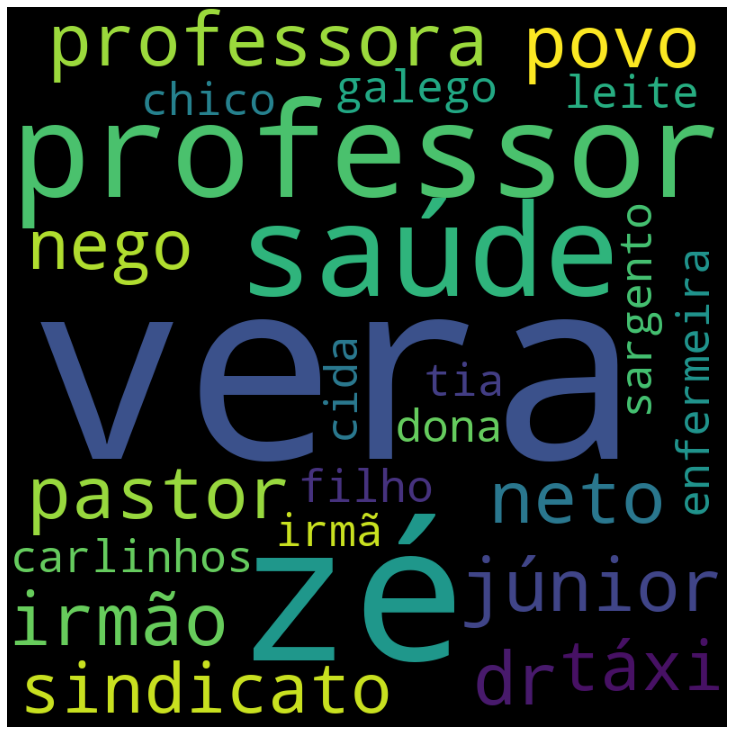

In [319]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [230]:
dados[dados['nome_urna']=='Pró Lai']

,cidade,cargo,numero,nome,nome_urna,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
2174,Amélia Rodrigues,Vereador,10321,Maria Alair Alves Dos Santos Lima,Pró Lai,REPUBLICANOS,Amélia Rodrigues,54,Feminino,Superior Completo,Casado(A),Parda,Servidor Público Municipal


In [6]:
s.nlargest(15)

SANTOS        35
SILVA         27
OLIVEIRA      20
ALVES         13
SOUZA         10
COSTA          9
SOARES         7
NETO           7
NASCIMENTO     7
SANTANA        6
FERREIRA       6
JESUS          6
PEREIRA        5
ASSIS          5
DIAS           5
dtype: int64

In [5]:
dict_nome = dict(collections.Counter(lista_nome))

s = pd.Series(dict_nome, index=dict_nome.keys())
del s['DE']
del s['DOS']
del s['DA']
del s['MARIA']

In [356]:
round(dados.groupby('cor_raca')['grau_instrucao'].value_counts(normalize=True)*100, 2)

cor_raca        grau_instrucao               
Amarela         Ensino Médio Completo            40.38
                Superior Completo                26.92
                Ensino Fundamental Incompleto    11.54
                Ensino Fundamental Completo       9.62
                Ensino Médio Incompleto           5.13
                Superior Incompleto               4.49
                Lê E Escreve                      1.92
Branca          Ensino Médio Completo            40.90
                Superior Completo                29.92
                Ensino Fundamental Incompleto    10.07
                Ensino Fundamental Completo       8.68
                Ensino Médio Incompleto           4.08
                Superior Incompleto               3.98
                Lê E Escreve                      2.37
Indígena        Ensino Médio Completo            35.82
                Ensino Fundamental Incompleto    18.66
                Ensino Fundamental Completo      13.43
                Sup

#### Analise Univariavel

Idade na posse:
    - vemos que a distribuicao maior fica em torno dos 50 anos de idade

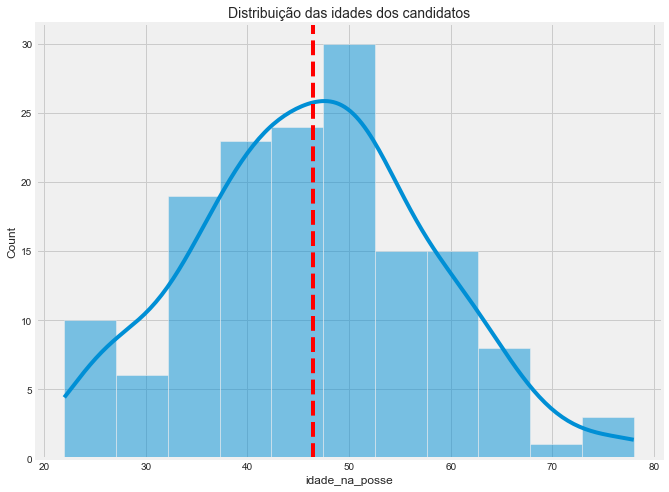

In [106]:
plt.figure(figsize=(10,8))

sns.histplot(cand_ibicarai['idade_na_posse'], kde=True)
plt.axvline(x=cand_ibicarai['idade_na_posse'].mean(), c='red', ls='--')
plt.title('Distribuição das idades dos candidatos', fontsize=14);

#### Analise Bivariavel

Relações de Gênero

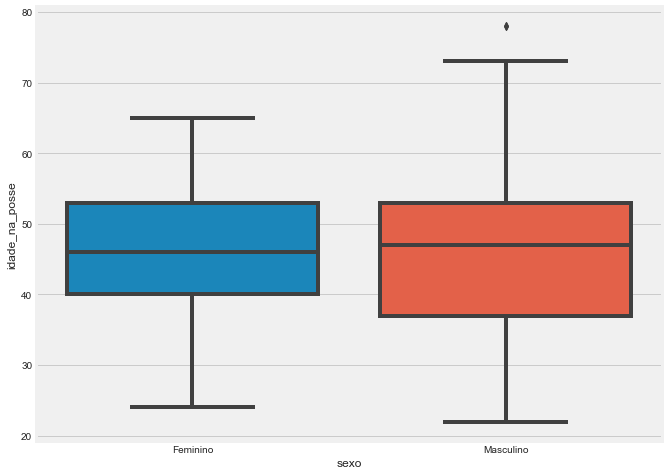

In [153]:
plt.figure(figsize=(10,8))
sns.boxplot(x=cand_ibicarai['sexo'], y=cand_ibicarai['idade_na_posse']);

#### Diferenças de Genero

In [7]:
# por grau de instrucao
# 86% das mulheres tem ensino medio completo ou superior completo. Homens ficam em 66%
# 34% tem ensino superior completo. Enquanto os homens sao 18%
cand_ibi.groupby('sexo')['grau_instrucao'].value_counts()

sexo       grau_instrucao               
FEMININO   ENSINO MÉDIO COMPLETO            28
           SUPERIOR COMPLETO                18
           SUPERIOR INCOMPLETO               3
           ENSINO FUNDAMENTAL INCOMPLETO     2
           ENSINO FUNDAMENTAL COMPLETO       1
           ENSINO MÉDIO INCOMPLETO           1
MASCULINO  ENSINO MÉDIO COMPLETO            48
           SUPERIOR COMPLETO                19
           ENSINO FUNDAMENTAL COMPLETO      15
           ENSINO FUNDAMENTAL INCOMPLETO    10
           ENSINO MÉDIO INCOMPLETO           5
           SUPERIOR INCOMPLETO               4
Name: grau_instrucao, dtype: int64

In [9]:
round(cand_ibi.groupby('sexo')['ocupacao'].value_counts(normalize=True)*100,2)

sexo       ocupacao                                                              
FEMININO   OUTROS                                                                    35.85
           COMERCIANTE                                                                9.43
           SERVIDOR PÚBLICO MUNICIPAL                                                 9.43
           TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)                   5.66
           DONA DE CASA                                                               3.77
           ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS                             3.77
           PROFESSOR DE ENSINO FUNDAMENTAL                                            3.77
           RECEPCIONISTA                                                              3.77
           VEREADOR                                                                   3.77
           AGENTE ADMINISTRATIVO                                                      1.89
        

In [10]:
cand_ibi.groupby('sexo')['idade_na_posse'].value_counts().nlargest(3)

sexo       idade_na_posse
MASCULINO  50                8
           42                5
           49                5
Name: idade_na_posse, dtype: int64

In [33]:
cand_ibi['sexo'].value_counts()

MASCULINO    101
FEMININO      53
Name: sexo, dtype: int64

#### Ocupação

In [25]:
cand_ibi.loc[cand_ibi['cargo'].str.contains('PREFEITO'), 'nome':'ocupacao']

,nome,nome_urna,cargo,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
7229,MONALISA GONCALVES TAVARES,DRA MONALISA,PREFEITO,DEM,ITABUNA,53,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,MÉDICO
10284,FABIANE LYRA DE SOUZA,FABIANE,VICE-PREFEITO,PT,ITABUNA,52,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,EMPRESÁRIO
13981,LEILTON SILVA GUEDES,DINHO GUEDES,VICE-PREFEITO,REPUBLICANOS,IBICARAÍ,62,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,COMERCIANTE
14100,EDENILSON GONÇALVES FERREIRA,TENENTE GONÇALVES,PREFEITO,REPUBLICANOS,IBICARAÍ,60,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR
17240,LUIZ JÁCOME BRANDÃO NETO,LULA BRANDÃO,PREFEITO,PSD,ITABUNA,47,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,PREFEITO
21831,GIVANILSON FRANCISCO DOS SANTOS,VAN,VICE-PREFEITO,AVANTE,ITAPETINGA,49,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,COMERCIANTE
29861,LENILDO ALVES SANTANA,LENILDO,PREFEITO,PT,FLORESTA AZUL,53,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,PROFESSOR DE ENSINO MÉDIO
30317,KLAUSS DE OLIVEIRA MARTINS PINHEIRO FARIAS,KLAUSS FARIAS,PREFEITO,PP,ITABUNA,37,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,ADVOGADO
35243,HENRIQUE PIMENTEL SAMPAIO NETO,HENRIQUE SAMPAIO,VICE-PREFEITO,PP,IBICARAÍ,50,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,REPRESENTANTE COMERCIAL
39581,ADELSON OLIVEIRA DOS SANTOS,ADELSON DA BANCA,VICE-PREFEITO,DEM,ITAPITANGA,51,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO


In [106]:
# aqui podemos analisar o grau de instrucao de acordo com a cor declarada de cada 1
cand_ibi[cand_ibi['cor_raca'].str.contains('PRETA')]['grau_instrucao'].value_counts()

ENSINO MÉDIO COMPLETO            11
SUPERIOR COMPLETO                 4
ENSINO FUNDAMENTAL COMPLETO       3
ENSINO FUNDAMENTAL INCOMPLETO     3
ENSINO MÉDIO INCOMPLETO           1
Name: grau_instrucao, dtype: int64

#### Sobre os Partidos

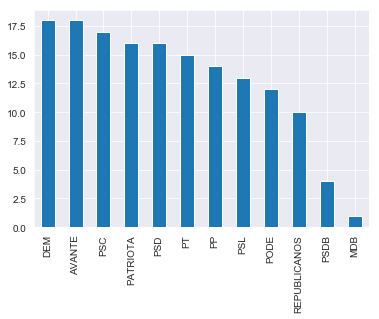

In [331]:
cand_ibi['partido'].value_counts().plot(kind='bar')

In [26]:
cand_ibi[cand_ibi['sexo'] == 'FEMININO']['partido'].value_counts()

PSD             7
AVANTE          6
PSC             6
PATRIOTA        6
DEM             6
PT              5
PSL             4
PODE            4
PP              4
REPUBLICANOS    3
PSDB            2
Name: partido, dtype: int64

In [28]:
cand_ibi.groupby('partido')['sexo'].value_counts()

partido       sexo     
AVANTE        MASCULINO    12
              FEMININO      6
DEM           MASCULINO    12
              FEMININO      6
MDB           MASCULINO     1
PATRIOTA      MASCULINO    10
              FEMININO      6
PODE          MASCULINO     8
              FEMININO      4
PP            MASCULINO    10
              FEMININO      4
PSC           MASCULINO    11
              FEMININO      6
PSD           MASCULINO     9
              FEMININO      7
PSDB          FEMININO      2
              MASCULINO     2
PSL           MASCULINO     9
              FEMININO      4
PT            MASCULINO    10
              FEMININO      5
REPUBLICANOS  MASCULINO     7
              FEMININO      3
Name: sexo, dtype: int64

#### Idade na Posse

In [27]:
cand_ibi[cand_ibi['sexo'] == 'FEMININO']['idade_na_posse'].value_counts().sort_index()

24    1
25    1
26    2
33    1
34    1
36    1
37    2
38    2
39    1
40    3
41    2
42    4
43    2
44    1
45    2
46    3
47    2
48    1
49    1
50    1
51    2
52    3
53    2
54    2
55    2
57    3
60    1
61    1
64    2
65    1
Name: idade_na_posse, dtype: int64

In [84]:
cand_ibi['idade_na_posse'].value_counts().sort_index()

22    1
24    2
25    2
26    3
27    2
28    3
29    1
30    2
33    4
34    4
35    2
36    4
37    5
38    4
39    2
40    5
41    3
42    9
43    6
44    5
45    2
46    6
47    5
48    3
49    6
50    9
51    4
52    8
53    5
54    2
55    4
56    1
57    3
58    3
59    3
60    4
61    1
62    4
63    2
64    2
65    1
67    3
70    1
73    1
78    2
Name: idade_na_posse, dtype: int64

#### Sexo

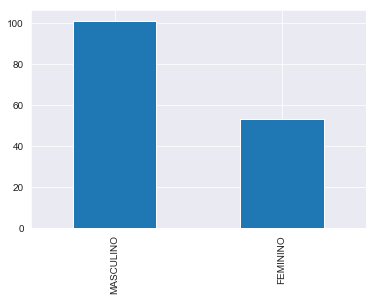

In [334]:
cand_ibi['sexo'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x=)

#### Grau de Instrucao

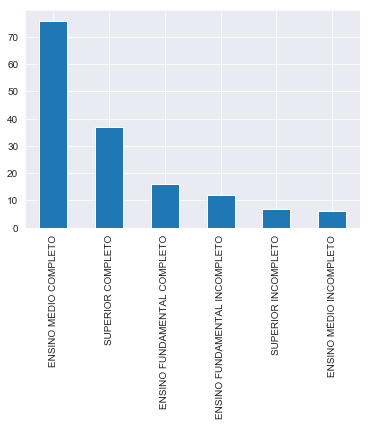

In [337]:
cand_ibi['grau_instrucao'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x=cand_ibi['grau_instrucao'], data=cand_ibi, hue=cand_ibi['idade_na_posse'])
plt.xticks(rotation=90)

#### Cor Raca

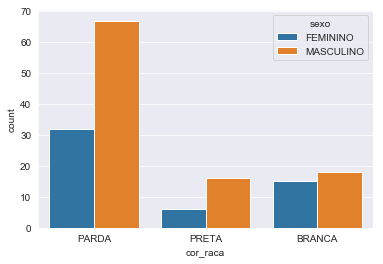

In [12]:
sns.countplot(x=cand_ibi['cor_raca'], data=cand_ibi, hue=cand_ibi['sexo'])

<AxesSubplot:>

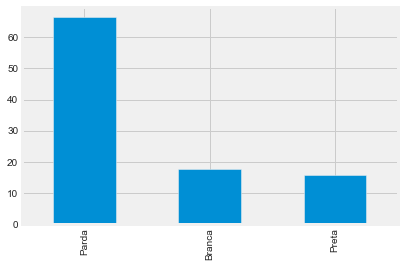

In [131]:
x = cand_ibicarai.groupby('sexo')['cor_raca'].get_group('Masculino').value_counts(normalize=True)*100
x.plot(kind='bar')

### Eleitores de Ibicarai

In [22]:
eleitores = pd.read_csv('eleitorado.csv', encoding='latin', sep=';')
ibi = eleitores[(eleitores['SG_UF'] == 'BA') & (eleitores['NM_MUNICIPIO'] == 'IBICARAÍ')]

In [23]:
ibi[ibi['DS_ESTADO_CIVIL'].isin(['VIÚVO'])]['QT_ELEITORES_PERFIL'].sum()

569

In [24]:
for x in ibi['DS_GRAU_ESCOLARIDADE'].unique():
    print(x + ':', ibi[ibi['DS_GRAU_ESCOLARIDADE'].isin([x])]['QT_ELEITORES_PERFIL'].sum())

ENSINO FUNDAMENTAL COMPLETO: 988
ENSINO MÉDIO COMPLETO: 4001
SUPERIOR INCOMPLETO: 640
ENSINO MÉDIO INCOMPLETO: 2393
ENSINO FUNDAMENTAL INCOMPLETO: 5232
SUPERIOR COMPLETO: 1466
LÊ E ESCREVE: 2108
ANALFABETO: 2365
NÃO INFORMADO: 10


In [36]:
ibi.groupby('DS_ESTADO_CIVIL')[['QT_ELEITORES_PERFIL']].sum()

,QT_ELEITORES_PERFIL
DS_ESTADO_CIVIL,
CASADO,3642
DIVORCIADO,418
NÃO INFORMADO,13
SEPARADO JUDICIALMENTE,77
SOLTEIRO,14484
VIÚVO,569


In [29]:
ibi.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

In [31]:
ibi

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
108561,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1600,16 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
108562,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1700,17 anos,6,ENSINO MÉDIO COMPLETO,5,4,0,0
108563,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1800,18 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
108564,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,4044,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,55,48,0,0
108565,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,5054,50 a 54 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,149,132,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642159,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,6569,65 a 69 anos,1,ANALFABETO,3,2,0,0
642160,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,6569,65 a 69 anos,8,SUPERIOR COMPLETO,1,1,0,0
642161,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
642162,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,8084,80 a 84 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0


Text(0.5, 0, 'Faixa Etaria x Grau Escolaridade')

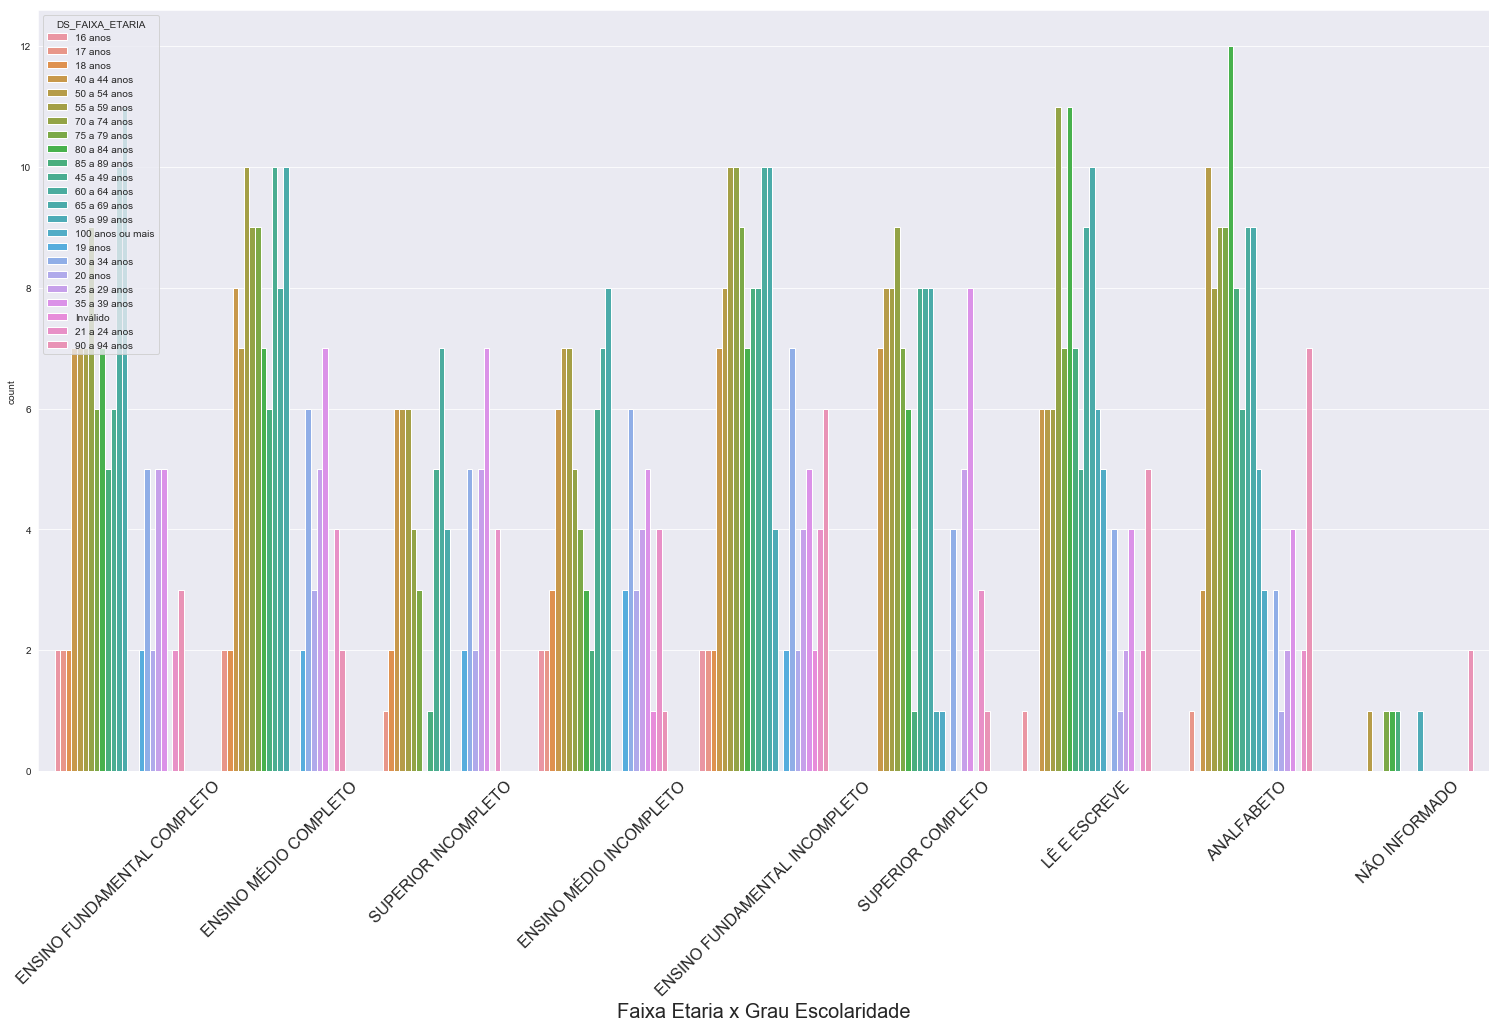

In [82]:
plt.figure(figsize=(26, 14))
sns.countplot(x=ibi['DS_GRAU_ESCOLARIDADE'], hue=ibi['DS_FAIXA_ETARIA'])
plt.xticks(rotation=45, fontsize=16)
plt.xlabel('Faixa Etaria x Grau Escolaridade', fontsize=20)
